<a href="https://colab.research.google.com/github/ArifAygun/Coal-Mine-Analysis/blob/main/Suhut_Coal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**3.1. Import Libraries**

In [39]:
import math
import random
import time
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, pearsonr
from scipy.cluster import hierarchy as hc
sns.set_theme(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###**3.2. Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Turkuvaz/

df = pd.read_csv('Suhut_Coal.csv')

Mounted at /content/drive/
/content/drive/My Drive/Turkuvaz


##**4. Data Preprocessing**

###**4.1. Dataset Information**

In [15]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Drill_Num,T-01,T-01,T-01,T-02,T-02,T-02,T-02,T-02,T-02,T-02
Lithology,LG,ZC,XC,LG,LG,LG,LG,LG,CS,LG
Deep_begin,16,25.4,25.8,7,7.75,9.75,17.5,23.5,24,24.2
Deep_end,16.2,25.5,26.0,7.3,7.85,10.0,18.1,24.0,24.2,24.7
Thickness,0.199999999999999,0.100000000000001,0.199999999999999,0.3,0.0999999999999996,0.25,0.600000000000001,0.5,0.199999999999999,0.5
Sample_Num,4817,4818,4819,4923,4924,4925,4926,4927,4928,4929
Lab_Num,L22-2161,L22-2170,L22-2209,L22-2175,L22-2157,L22-2177,L22-2140,L22-2141,L22-2179,L22-2186
Org_Moist%,16.583333,18.408333,21.452778,29.466667,27.95,24.488889,27.988889,27.330556,15.844444,26.441667
Dry_Ash%,55.742149,77.947814,38.11153,53.884439,48.174158,61.652683,36.369952,44.692279,88.316118,31.596798
Org_Ash%,46.498243,63.59892,29.935548,38.006491,34.709481,46.554626,26.190407,32.477631,74.32292,23.242078


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Drill_Num   367 non-null    object 
 1   Lithology   367 non-null    object 
 2   Deep_begin  367 non-null    object 
 3   Deep_end    367 non-null    float64
 4   Thickness   367 non-null    object 
 5   Sample_Num  367 non-null    int64  
 6   Lab_Num     281 non-null    object 
 7   Org_Moist%  354 non-null    float64
 8   Dry_Ash%    354 non-null    float64
 9   Org_Ash%    354 non-null    float64
 10  Dry_Vol%    354 non-null    float64
 11  Org_Vol%    354 non-null    float64
 12  Dry_Sulp%   354 non-null    float64
 13  Org_Sulp%   354 non-null    float64
 14  Dry_Hydro%  281 non-null    float64
 15  Org_Hydro%  281 non-null    float64
 16  Dry_GCV     354 non-null    object 
 17  Org_GCV     281 non-null    object 
 18  Dry_OVC     281 non-null    object 
 19  Org_OVC     354 non-null    o

## Drop Unnecessary Columns

In [16]:
df.drop(columns=['Drill_Num', 'Sample_Num', 'Lab_Num', 'Density'], inplace=True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Deep_end,367.0,39.933597,41.752293,1.550000,11.900000,22.100000,50.000000,153.400000
Org_Moist%,354.0,25.125359,4.755561,8.602778,22.663750,25.623611,28.293056,41.292500
Dry_Ash%,354.0,48.769955,16.473439,14.172913,36.540896,47.639909,58.792485,94.996979
Org_Ash%,354.0,37.030293,14.312633,9.584826,26.390821,35.128185,45.112059,80.852984
Dry_Vol%,354.0,32.735580,9.104438,4.984069,27.754174,34.660404,40.011553,47.524721
Org_Vol%,354.0,24.248131,6.284407,3.727585,20.770293,25.595055,28.999806,36.256082
Dry_Sulp%,354.0,4.465523,2.384643,0.000000,2.858827,4.701457,6.220784,12.032124
Org_Sulp%,354.0,3.293720,1.720673,0.000000,2.230890,3.534523,4.556592,9.139735
Dry_Hydro%,281.0,2.865471,1.052892,-0.464119,2.275247,3.044636,3.612875,4.554548
Org_Hydro%,281.0,2.120084,0.728080,-0.401649,1.736617,2.267519,2.650430,3.209180


**Check missing and duplicated values:**

In [18]:
missing_values = df.isnull().sum()
missing_values

Lithology      0
Deep_begin     0
Deep_end       0
Thickness      0
Org_Moist%    13
Dry_Ash%      13
Org_Ash%      13
Dry_Vol%      13
Org_Vol%      13
Dry_Sulp%     13
Org_Sulp%     13
Dry_Hydro%    86
Org_Hydro%    86
Dry_GCV       13
Org_GCV       86
Dry_OVC       86
Org_OVC       13
dtype: int64

In [9]:
duplicates = df[df.duplicated()]
duplicates.count()

Drill_Num     0
Lithology     0
Deep_begin    0
Deep_end      0
Thickness     0
Sample_Num    0
Lab_Num       0
Org_Moist%    0
Dry_Ash%      0
Org_Ash%      0
Dry_Vol%      0
Org_Vol%      0
Dry_Sulp%     0
Org_Sulp%     0
Dry_Hydro%    0
Org_Hydro%    0
Dry_GCV       0
Org_GCV       0
Dry_OVC       0
Org_OVC       0
Density       0
dtype: int64

In [22]:
unique_lithologies = df['Lithology'].unique().tolist()
print(unique_lithologies)

['LG', 'ZC', 'XC', 'CS', 'SI', 'CL', 'MR', 'LG/MR', 'LG-MR-LG(COMP)', 'COMPOZİTE', 'MR-ZC']


In [23]:
lithology_counts = df['Lithology'].value_counts()
print(lithology_counts)

LG                252
ZC                 32
MR                 29
XC                 22
CS                 13
CL                 13
COMPOZİTE           2
SI                  1
LG/MR               1
LG-MR-LG(COMP)      1
MR-ZC               1
Name: Lithology, dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'Lithology' column
df['Lithology_encoded'] = label_encoder.fit_transform(df['Lithology'])
# Now, the 'Lithology_encoded' column will contain the encoded lithology types
# Drop the original 'Lithology' column
df.drop(columns=['Lithology'], inplace=True)

In [29]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Deep_begin,16,25.4,25.8,7,7.75,9.75,17.5,23.5,24,24.2
Deep_end,16.2,25.5,26.0,7.3,7.85,10.0,18.1,24.0,24.2,24.7
Thickness,0.199999999999999,0.100000000000001,0.199999999999999,0.3,0.0999999999999996,0.25,0.600000000000001,0.5,0.199999999999999,0.5
Org_Moist%,16.583333,18.408333,21.452778,29.466667,27.95,24.488889,27.988889,27.330556,15.844444,26.441667
Dry_Ash%,55.742149,77.947814,38.11153,53.884439,48.174158,61.652683,36.369952,44.692279,88.316118,31.596798
Org_Ash%,46.498243,63.59892,29.935548,38.006491,34.709481,46.554626,26.190407,32.477631,74.32292,23.242078
Dry_Vol%,26.531215,15.165369,42.686184,37.938294,29.834299,29.562989,35.35691,30.472927,9.706391,40.263043
Org_Vol%,22.131455,12.373677,33.528812,26.759143,21.495612,22.323342,25.460904,22.144507,8.168467,29.616823
Dry_Sulp%,3.504163,1.070276,3.534038,7.761639,3.859279,7.115003,6.16631,5.065917,2.205872,7.217075
Org_Sulp%,2.923056,0.873256,2.775889,5.474543,2.78061,5.372618,4.440428,3.681373,1.856364,5.30876


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Deep_begin         367 non-null    object 
 1   Deep_end           367 non-null    float64
 2   Thickness          367 non-null    object 
 3   Org_Moist%         354 non-null    float64
 4   Dry_Ash%           354 non-null    float64
 5   Org_Ash%           354 non-null    float64
 6   Dry_Vol%           354 non-null    float64
 7   Org_Vol%           354 non-null    float64
 8   Dry_Sulp%          354 non-null    float64
 9   Org_Sulp%          354 non-null    float64
 10  Dry_Hydro%         281 non-null    float64
 11  Org_Hydro%         281 non-null    float64
 12  Dry_GCV            354 non-null    object 
 13  Org_GCV            281 non-null    object 
 14  Dry_OVC            281 non-null    object 
 15  Org_OVC            354 non-null    object 
 16  Lithology_encoded  367 non

In [31]:
# Columns to convert to integer
conv = ['Deep_begin', 'Thickness', 'Dry_GCV', 'Org_GCV', 'Dry_OVC', 'Org_OVC']

# Loop through the specified columns and convert them to integer (if possible)
for column in conv:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

df[column].fillna(0, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Deep_begin         366 non-null    float64
 1   Deep_end           367 non-null    float64
 2   Thickness          366 non-null    float64
 3   Org_Moist%         354 non-null    float64
 4   Dry_Ash%           354 non-null    float64
 5   Org_Ash%           354 non-null    float64
 6   Dry_Vol%           354 non-null    float64
 7   Org_Vol%           354 non-null    float64
 8   Dry_Sulp%          354 non-null    float64
 9   Org_Sulp%          354 non-null    float64
 10  Dry_Hydro%         281 non-null    float64
 11  Org_Hydro%         281 non-null    float64
 12  Dry_GCV            353 non-null    float64
 13  Org_GCV            280 non-null    float64
 14  Dry_OVC            277 non-null    float64
 15  Org_OVC            367 non-null    float64
 16  Lithology_encoded  367 non

In [33]:
# Calculate the median for each column
median_values = df.median()

# Impute missing values with the median values
df.fillna(median_values, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Deep_begin         367 non-null    float64
 1   Deep_end           367 non-null    float64
 2   Thickness          367 non-null    float64
 3   Org_Moist%         367 non-null    float64
 4   Dry_Ash%           367 non-null    float64
 5   Org_Ash%           367 non-null    float64
 6   Dry_Vol%           367 non-null    float64
 7   Org_Vol%           367 non-null    float64
 8   Dry_Sulp%          367 non-null    float64
 9   Org_Sulp%          367 non-null    float64
 10  Dry_Hydro%         367 non-null    float64
 11  Org_Hydro%         367 non-null    float64
 12  Dry_GCV            367 non-null    float64
 13  Org_GCV            367 non-null    float64
 14  Dry_OVC            367 non-null    float64
 15  Org_OVC            367 non-null    float64
 16  Lithology_encoded  367 non

##**5. Exploratory Data Analysis**

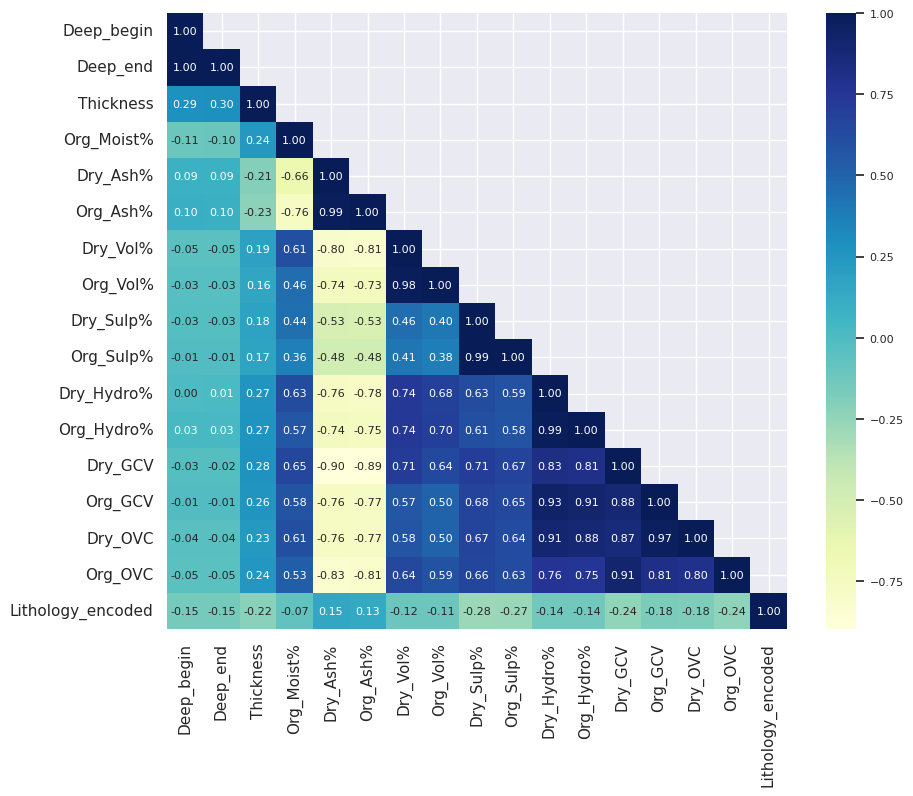

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(df.corr()), k=1)

# Create a heatmap with smaller font size for numbers
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
heatmap = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 8})

# Set a smaller font size for the color bar labels
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.show()


**Skewness, Kurtosis, Shapiro-Wilk test**

In [37]:
t,p = stats.shapiro(df['Org_OVC'])

print("Skewness: %f" % abs(df['Org_OVC']).skew())
print("Kurtosis: %f" % abs(df['Org_OVC']).kurt())
print("Shapiro_Test of t: %f" % t)
print("Shapiro_Test of p: %f" % p)

Skewness: -0.386406
Kurtosis: -0.899041
Shapiro_Test of t: 0.946959
Shapiro_Test of p: 0.000000


**Histogram and a QQ plot to visualize the distribution of the 'conc_Si' variable and assess its departure from normality.**

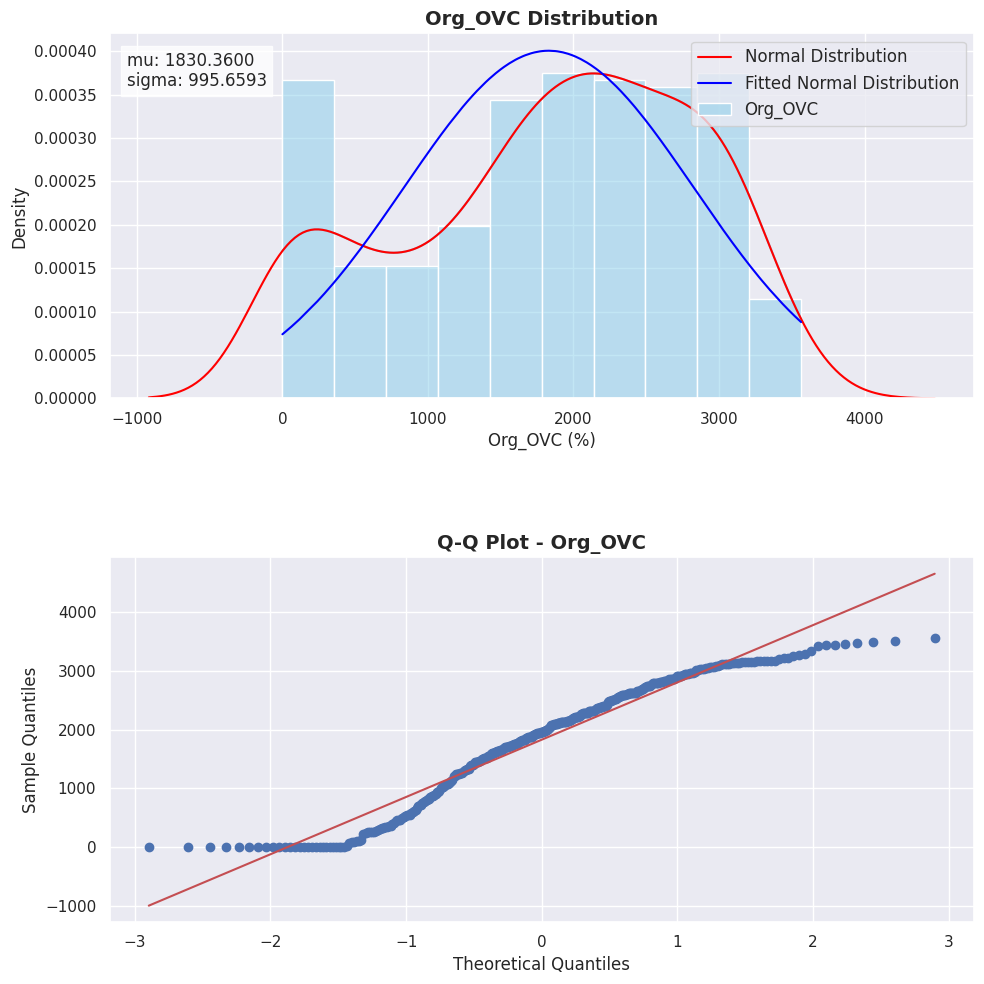

In [43]:
# Fitting normal distribution
(mu, sigma) = norm.fit(df['Org_OVC'])

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Histogram, KDE, and fitted normal distribution
sns.histplot(df['Org_OVC'], kde=True, stat="density", common_norm=False,
             color='skyblue', label='Org_OVC', ax=axes[0])
sns.kdeplot(df['Org_OVC'], color='red', label='Normal Distribution', ax=axes[0])
sns.lineplot(x=df['Org_OVC'], y=norm.pdf(df['Org_OVC'], mu, sigma),
             color='blue', label='Fitted Normal Distribution', ax=axes[0])

axes[0].text(0.02, 0.95, f"mu: {mu:.4f}\nsigma: {sigma:.4f}", transform=axes[0].transAxes,
             verticalalignment='top',bbox=dict(facecolor='white', alpha=0.8), fontsize=12)

axes[0].set_title('Org_OVC Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Org_OVC (%)", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend(loc='upper right', fontsize=12)

# Q-Q plot
stats.probplot(df['Org_OVC'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot - Org_OVC", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Theoretical Quantiles", fontsize=12)
axes[1].set_ylabel("Sample Quantiles", fontsize=12)

plt.tight_layout(h_pad=5)
plt.show()

**Log Transformation For Fitting the distribution of Silica Concentrate**

In [ ]:
# Log transformation
transformed_conc = np.log(flotation['conc_Si'])

# Fitting normal distribution
(mu, sigma) = norm.fit(transformed_conc)

fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Histogram and KDE plot
sns.histplot(transformed_conc, kde=True, stat="density", common_norm=False,
             color='skyblue', label='Silica Concentrate', ax=axes[0])
sns.kdeplot(transformed_conc, color='red', label='Normal Distribution', ax=axes[0])
sns.lineplot(x=transformed_conc, y=norm.pdf(transformed_conc, mu, sigma),
             color='blue', label='Fitted Normal Distribution', ax=axes[0])

axes[0].set_title('Transformed Silica Concentrate Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Transformed Silica Concentrate", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend(loc='upper right', fontsize=10)

axes[0].text(0.02, 0.95, f"mu: {mu:.4f}\nsigma: {sigma:.4f}", transform=axes[0].transAxes,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8), fontsize=12)

# Q-Q plot for transformed data
stats.probplot(transformed_conc, dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot - Transformed Silica Concentrate", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Theoretical Quantiles", fontsize=12)
axes[1].set_ylabel("Sample Quantiles", fontsize=12)

plt.tight_layout(h_pad=5)
plt.show()

# Calculate skewness and kurtosis
skewness = transformed_conc.skew()
kurtosis = transformed_conc.kurt()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(transformed_conc)
shapiro_t = shapiro_test.statistic
shapiro_p = shapiro_test.pvalue

print("Skewness: %.4f" % skewness)
print("Kurtosis: %.4f" % kurtosis)
print("Shapiro-Wilk test:")
print("  - Test statistic: %.4f" % shapiro_t)
print("  - p-value: %.4f" % shapiro_p)

**Before Transformation:**

- Skewness: 0.9806
- Kurtosis: 0.0226
- Shapiro-Wilk test: Test statistic: 0.8939, p-value: 0.0000

**After Log Transformation:**

- Skewness: 0.2953
- Kurtosis: -0.8692
- Shapiro-Wilk test: Test statistic: 0.9679, p-value: 0.0000

1. Skewness:
The transformed 'conc_Si' variable has a skewness value of 0.2953. Skewness measures the asymmetry of a distribution. A positive skewness value indicates a longer right tail, suggesting that the distribution is right-skewed. In this case, the transformed variable exhibits a slight right skewness.

2. Kurtosis:
The transformed 'conc_Si' variable has a kurtosis value of -0.8692. Kurtosis measures the heaviness of the tails of a distribution. A negative kurtosis value indicates lighter tails compared to a normal distribution. In this case, the transformed variable exhibits negative kurtosis, indicating lighter tails.

3. Shapiro-Wilk Test:
The Shapiro-Wilk test is performed on the transformed 'conc_Si' variable to assess its normality. The test returns a test statistic and a p-value. The null hypothesis of the test is that the data is normally distributed.

4. Test Statistic: The test statistic obtained from the Shapiro-Wilk test is 0.9679.
5. p-value: The p-value associated with the Shapiro-Wilk test is 0.0000. Since the p-value is below the typical significance level of 0.05, we reject the null hypothesis, indicating that the transformed 'conc_Si' variable does not follow a normal distribution.

Based on the skewness, kurtosis, and Shapiro-Wilk test results, we can conclude that the transformed 'conc_Si' variable deviates from a normal distribution. The slight right skewness and negative kurtosis suggest departures from normality, and the Shapiro-Wilk test further supports this by rejecting the null hypothesis of normality.

**Confidence Interval of Silica Concentrate**

In [ ]:
column_data = flotation["conc_Si"].values

num_iterations = 100000
confidence_level = 0.95

# Create an empty array to store the bootstrap sample means
bootstrap_means = np.empty(num_iterations)

# Perform the bootstrap sampling
for i in range(num_iterations):
    # Generate a bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(column_data,
                       size=len(column_data), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Sort the bootstrap means and calculate the lower and upper percentiles
sorted_means = np.sort(bootstrap_means)
lower_percentile = (1 - confidence_level) / 2
upper_percentile = 1 - lower_percentile

# Calculate the confidence interval
lower_bound = sorted_means[int(lower_percentile * num_iterations)]
upper_bound = sorted_means[int(upper_percentile * num_iterations)]

print("Bootstrap Confidence Interval:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Plot the bootstrap distribution
plt.figure(figsize=(15, 10))
sns.histplot(bootstrap_means, kde=True, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
plt.xlabel('Bootstrap Sample Mean')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Silica Concentration',
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

The confidence interval provides a range of values within which we can be confident that the true population mean of the "conc_Si" column lies, with a specified confidence level (in this case, 95%). The lower bound of the interval is 2.2877, and the upper bound is 2.3574.

This interval estimation is obtained through the process of bootstrap resampling, where multiple bootstrap samples are generated by randomly sampling observations with replacement from the original dataset. The mean of each bootstrap sample is then calculated, resulting in a distribution of bootstrap means. From this distribution, the lower and upper percentiles corresponding to the desired confidence level are determined to establish the confidence interval.

The plot displays the histogram of the bootstrap sample means, showing the distribution of the resampled means. The red dashed line represents the lower bound of the confidence interval, and the blue dashed line represents the upper bound.

Target variable "conc_Si" column, the confidence interval allows us to infer that the true population mean of silica concentration lies between approximately 2.2877 and 2.3574 with a 95% confidence level. This information can be valuable for making inferences or drawing conclusions about the silica concentration in the flotation process.

In [ ]:
flotation.info()

## **6. Modelling**

In [ ]:
flotation_data = flotation.drop(columns=['conc_Fe', 'std_conc_Fe', 'std_conc_Si'])
flotation_target = flotation['conc_Si']

In [ ]:
flotation_data = np.array(flotation_data)
flotation_target = np.array(flotation_target)
flotation_target

In [ ]:
flotation_target = flotation_target.reshape(-1,1)
flotation_target

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler_x = StandardScaler()
X = scaler_x.fit_transform(flotation_data)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(flotation_target)

In [ ]:
mylinearmodel = LinearRegression()
mylinearmodel.fit(flotation_data, flotation_target)

yhat = mylinearmodel.predict(flotation_data)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yhat, flotation_target)
mse
plt.plot( flotation_target,yhat,'.')
plt.xlabel('silica concentrate')
plt.ylabel('prediction')

In [ ]:
# supervised learning

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# build a linear regression model with the training data

lrm = LinearRegression()
lrm.fit(X_train, y_train)

model_accuracy = lrm.score(X_test, y_test)
model_accuracy

In [ ]:
# build a decision tree for the training data

from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)


accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

In [ ]:
# build a random forest for the training data

from sklearn.ensemble import RandomForestRegressor

ForestRegression_model = RandomForestRegressor(n_estimators=80,max_depth=10)
ForestRegression_model.fit(X_train, y_train)

accuracy_ForestRegression = ForestRegression_model.score(X_test, y_test)
accuracy_ForestRegression

In [ ]:
# build a neural network for the training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from unittest import result


optimizer = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7, amsgrad=False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim=22, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation='linear'))
ANN_model.compile(loss = 'mse', optimizer= 'adam')
ANN_model.summary()

In [ ]:
%pip install <tensorflow>

In [ ]:
X_train = X_train[:, :22]

In [ ]:
history = ANN_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim=22, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dense(1, activation='linear'))
ANN_model.compile(loss='mse', optimizer='adam')

# Verify the summary and ensure the model is properly defined
ANN_model.summary()


In [ ]:
history = ANN_model.fit(X_train, y_train, epochs=10, validation_split=0.2)


In [ ]:

history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# so far the best model>>>>>>>>>>>Decision Tree

y_predict = DecisionTree_model.predict(X_test)
plt.plot(y_predict, y_test,'.', color='b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
twoD_y_predict = y_predict.reshape(-1,1)
y_predict_orig = scaler_y.inverse_transform(twoD_y_predict)
twoD_y_test = y_test.reshape(-1,1)
y_test_orig = scaler_y.inverse_transform(twoD_y_test)
plt.plot(y_test_orig, y_predict_orig, '.', color='r')
plt.xlabel('Original Model Predictions')
plt.ylabel('Original True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test_orig, y_predict_orig)
RMSE =format(np.sqrt(MSE), '.3f')
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
k = y_test_orig[1]
n = len(y_predict_orig)
adj_r2 = 1-((1-r2)*(n-1)/(n-k-1))


print('MSE= ', MSE,'   ///   ', 'RMSE= ',RMSE,'   ///   ' ,'MAE= ', MAE, '   ///   ', 'r2= ',r2, '   ///   ', 'adj r2= ', adj_r2)